# Scaling

Changing the range of our dataset.


1. Scaling - when, where, what, why, and how

    - why
        - visualize the combination of 2 variables with different scales
        - stats tests that assume normality
        - a better interpretation of the data (e.g. log scaling)
        - Faster convergene of gradient descent
        - improves most model's implementation
        - Prevent skews for algorithms which use distance metrics
        https://docs.google.com/presentation/d/1yk2_-y6F0qwmIk-NnRu52MsNffvbpRvRNfZDREZ6K2w/edit?usp=sharing
        
    - when
        - data prep / exploration
        - **after** data splitting
    - where
        - fit on the training dataset
        - usually just the independent variables
        - indep vars are scaled independently
        - scale whatever goes into the model
    - how
        - `sklearn.preprocessing` -- requires 2d array
        - make the thing, fit the thing, use the thing
        - `.fit` to learn parameters, `.transform` to apply the scaling
        - separate scaled dataframes and/or columns


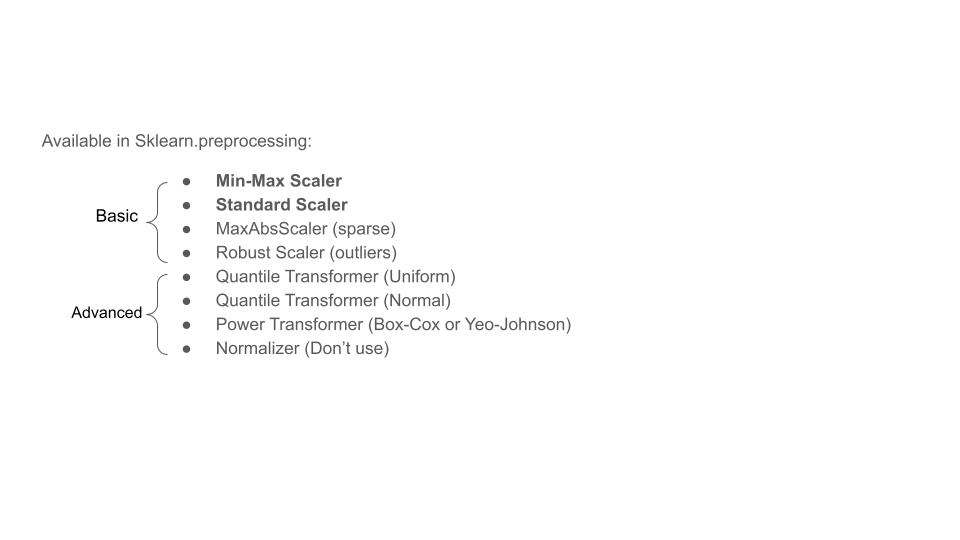

2. Linear Scaling

   - MinMax: everything between 0 and 1 (or a range of your choice)
        - Sensitive to outliers
    
        $$ x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)} $$
    
     
    
   - Standard: a zscore, standard deviations from the mean, **center** + **scale**
    
        $$ x' = \frac{x - \bar{x}}{\sigma_x} $$
        
        - **centering**: subtracting the mean
        - **scaling**: dividing by the standard deviation
        - Sensitive to outliers
          
          
          
   - Robust: robust to and preserves outliers
    
        $$ x' = \frac{x - \text{med}(x)}{\text{IQR}_x} $$


3. Non-linear Scaling

    - Quantile: non-linear transformation, mapped to a uniform or Gaussian distribution
    - Log Transformation
        
    - Power Transformation: Box-Cox and Yeo-Johnson
    
    


In [ ]:
x = [1,2,3,4,5]
y = [10,12, 15,18, 100000]
plt.bar(x,y)

In [ ]:
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
tips = pydataset.data('tips')
tips.head()

In [ ]:
#plot distribution of tip and total bill
tips.total_bill.plot.hist()
tips.tip.plot.hist();

In [ ]:
# split the data

train_and_validate, test = train_test_split(tips, test_size=.12, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.12, random_state=123)

train.shape, test.shape, validate.shape

## Min-Max Scaler
scaled values in range [0-1]  
aka Normalization


 $$ x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)} $$

In [ ]:
# 1. create the object
scaler = sklearn.preprocessing.MinMaxScaler()

# 2. fit the object (learn the min and max value)
scaler.fit(train[['total_bill', 'tip']])

# 3. use the object (use the min, max to do the transformation)

scaled_bill = scaler.transform(train[['total_bill', 'tip']])
scaled_bill[:10]

In [ ]:
# pd.DataFrame(scaled_bill, index = train.index,
#             columns = ['scaled_total_bill', 'scaled_tip'])

In [ ]:
# assign the scaled values as new columns in the train
train[['total_bill_scaled', 'tip_scaled']] = scaled_bill

In [ ]:
train.head()

In [ ]:
# make new scaled columns for validate and test (transform only)

test[['total_bill_scaled', 'tip_scaled']] = scaler.transform(test[['total_bill', 'tip']])
validate[['total_bill_scaled', 'tip_scaled']] = scaler.transform(validate[['total_bill', 'tip']])

In [ ]:
# Visualize the un-scaled and scaled distribution for total_bill

plt.figure(figsize=(13, 6))

# subplot 1
plt.subplot(121)
train.total_bill.plot.hist(title='Original')

#subplot 2
plt.subplot(122)
train.total_bill_scaled.plot.hist(title='Min-Max Scaled');

In [ ]:
# Visualize the scaling total_bill:

plt.scatter(train.total_bill, train.total_bill_scaled)
plt.xlabel('Total Bill ($)')
plt.ylabel('Total Bill Scaled')
plt.title('Min-Max Scaler');

## Standard Scaler
Removes the mean and scales the data to unit variance

$$ x' = \frac{x - \bar{x}}{\sigma_x} $$

  $\mu = 0$ and $\sigma = 1$

In [ ]:
# 1. create the object
scaler = sklearn.preprocessing.StandardScaler()

# 2. fit the object
scaler.fit(train[['total_bill']])

# 3. use the object. Scale total_bill only
train['total_bill_scaled'] = scaler.transform(train[['total_bill']])
test['total_bill_scaled'] = scaler.transform(test[['total_bill']])
validate['total_bill_scaled'] = scaler.transform(validate[['total_bill']])

In [ ]:
#plot the scaled and unscaled distributions
plt.figure(figsize=(13, 6))

plt.subplot(121)
train.total_bill.plot.hist(title='Original')

plt.subplot(122)
train.total_bill_scaled.plot.hist(title='Standard Scaled');

In [ ]:
plt.scatter(train.total_bill, train.total_bill_scaled)
plt.xlabel('Total Bill ($)')
plt.ylabel('Total Bill Scaled')
plt.title('Standard Scaler');

# Another visualization: Standardization and Normalization:
https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/NormVsStand_box_plots-1.png

## Robust Scaler
Scaled values are not influenced by a few outliers


In [ ]:
# 1. create the object
scaler = sklearn.preprocessing.RobustScaler()

# 2. fit the object
scaler.fit(train[['total_bill']])

# 3. use the object
train['total_bill_scaled'] = scaler.transform(train[['total_bill']])
test['total_bill_scaled'] = scaler.transform(test[['total_bill']])
validate['total_bill_scaled'] = scaler.transform(validate[['total_bill']])

#plot the scaled and unscaled distributions
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.total_bill.plot.hist(title='Original')
plt.subplot(122)
train.total_bill_scaled.plot.hist(title='Robust Scaled');

## Non-linear Scaler

non-linear transformation such that the probability density function of each feature will be mapped to a uniform or Gaussian distribution

In [ ]:
# 1. create the object
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

# 2. fit the object
scaler.fit(train[['total_bill']])

# 3. use the object
train['total_bill_scaled'] = scaler.transform(train[['total_bill']])
test['total_bill_scaled'] = scaler.transform(test[['total_bill']])
validate['total_bill_scaled'] = scaler.transform(validate[['total_bill']])

#plot the scaled and unscaled distribution
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.total_bill.plot.hist(title='Original')
plt.subplot(122)
train.total_bill_scaled.plot.hist(title='Quantile Transformed to Normal');

In [ ]:
sns.ecdfplot(data = tips, y = 'total_bill')

In [ ]:
plt.scatter(train.total_bill, train.total_bill_scaled)
plt.xlabel('Total Bill ($)')
plt.ylabel('Total Bill Scaled')
plt.title('Quantile Transformer');

## Implementation

Suppose I want to scale tip, total bill, and size.

The goal is a dataframe with the original columns + scaled columns, e.g. `tip_scaled`.

In [ ]:
train_and_validate, test = train_test_split(tips, test_size=.12, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.12, random_state=123)

In [ ]:
def add_scaled_columns(train, validate, test, scaler, columns_to_scale):
    
    # new column names
    new_column_names = [c + '_scaled' for c in columns_to_scale]
    
    # Fit the scaler on the train
    scaler.fit(train[columns_to_scale])
    
    # transform train validate and test
    train = pd.concat([
        train,
        pd.DataFrame(scaler.transform(train[columns_to_scale]), columns=new_column_names, index=train.index),
    ], axis=1)
    
    validate = pd.concat([
        validate,
        pd.DataFrame(scaler.transform(validate[columns_to_scale]), columns=new_column_names, index=validate.index),
    ], axis=1)
    
    
    test = pd.concat([
        test,
        pd.DataFrame(scaler.transform(test[columns_to_scale]), columns=new_column_names, index=test.index),
    ], axis=1)
    
    return train, validate, test

In [ ]:
# use the function defined above:
train, validate, test = add_scaled_columns(
    train,
    validate,
    test,
    scaler=sklearn.preprocessing.MinMaxScaler(),
    columns_to_scale=['tip', 'total_bill', 'size'],
)

In [ ]:
# look at train head
train.head()


[Visual Demos](https://stats-demos.zach.wiki/)



#### TLDR

1. Three "types" of model in relation to numeric scaling
    - don't care (i.e. Decision Tree, RF)
    - might be required (e.g. Linear regression, Logistic regression)
    - must scale (distance-based algorithms (e.g. KNN, KMeans))

2.  Generally prefer unscaled data, except in modeling.

3. Sklearn preprocessing:     
    - Learn parameters for scaling from the training split only.
    - Start with Min-Max or Standard Scalar (handle outliers first)
    - Robust Scaler (if outliers are present in data)
  

Master basic scalers first before moving to non-linear/advanced transformers 
    
   
   

Useful References:
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
